In [1]:
import pyibisami.amimodel as ami
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
myModel = ami.AMIModel('PCIe_Tx.dll')

In [3]:
initData = ami.AMIModelInitializer({'root_name' : 'myDLL', 'de_emphasis' : 3})

In [4]:
array_size = 4096
step = np.zeros((array_size))
step[:array_size/2:]=-0.5
step[array_size/2:]=0.5
initData.channel_response = step
initData.row_size = array_size
initData.bit_time = 1/2.5e9
initData.sample_interval = 12.5e-12

In [5]:
myModel.initialize(initData)

In [17]:
myModel.msg

'The IBIS-AMI model, PCIe_Tx, is unable to initialize the parameter de_emphasis from the AMI_Init arguments.  The model will use the default setting. '

In [6]:
h1 = myModel.initOut

In [7]:
T = myModel.sample_interval
t = [i * T for i in range(len(h1))]

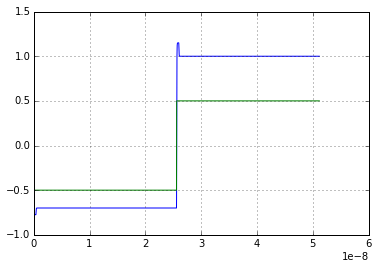

In [11]:
plt.plot(t, h1, t, myModel.channel_response)
plt.grid(1)

In [9]:
H = np.fft.fft(h1)

In [10]:
freqs = [i * (1/myModel.sample_interval) / len(t) for i in range(len(t) / 2)]

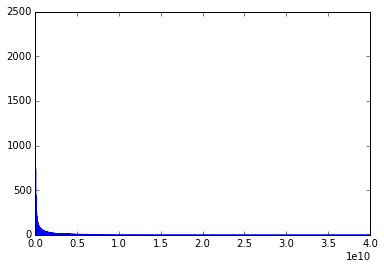

In [11]:
plt.plot(freqs, abs(H[:len(H)/2]))

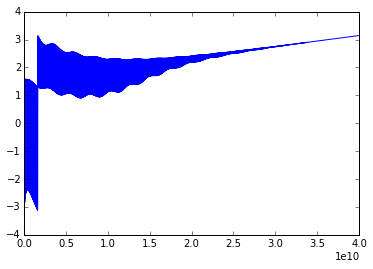

In [12]:
plt.plot(freqs, np.angle(H[:len(H)/2]))

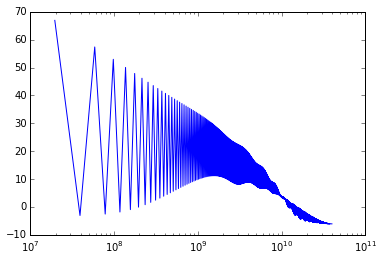

In [13]:
plt.semilogx(freqs, 20*np.log10(abs(H[:len(H)/2])))

In [14]:
myModel.ami_params_in

'(myDLL (de_emphasis 6))'

In [16]:
initData.ami_params

{'de_emphasis': 6, 'root_name': 'myDLL'}

In [16]:
myModel.ami_params_out

''